In [1028]:
import pandas as pd
import urllib.request

In [1029]:
url = ('https://opendata.arcgis.com/datasets/e5ceebe7edba44cc8f875ca54cc2341a_0/FeatureServer/0/query?outFields=*&where=1%3D1')

In [1030]:
with urllib.request.urlopen(url) as response:
  my_json = response.read()

In [1031]:
from pandas import DataFrame
import json

In [1032]:
data = json.loads(my_json)
data['features']

refactored_data = []

for attribute in data['features']:
  refactored_data.append(attribute['attributes'])


In [1033]:
df = DataFrame(refactored_data)

In [1034]:
df.head()

,date,cumulativecases_specimen,dailycases_specimen,cumulativedeaths_date,dailydeaths_date,dailypcr_specimen,cumulativepcr_specimen,dailysero_specimen,cumulativesero_specimen,hospital_cases,icu_cases,snf_cases,inmate_cases,peh_cases,snf_dths,inmate_dths,peh_dths,OBJECTID
0,1/22/2020,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1/23/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1/24/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [1035]:
df.tail()

,date,cumulativecases_specimen,dailycases_specimen,cumulativedeaths_date,dailydeaths_date,dailypcr_specimen,cumulativepcr_specimen,dailysero_specimen,cumulativesero_specimen,hospital_cases,icu_cases,snf_cases,inmate_cases,peh_cases,snf_dths,inmate_dths,peh_dths,OBJECTID
185,7/25/2020,35037.0,124.0,586.0,0.0,2199.0,402071.0,1.0,50874.0,687.0,201.0,1516.0,464.0,130.0,247.0,0.0,1.0,185
186,7/26/2020,35084.0,47.0,587.0,1.0,1754.0,403825.0,5.0,50879.0,661.0,204.0,1516.0,464.0,130.0,248.0,0.0,1.0,186
187,7/27/2020,35108.0,24.0,NaN,NaN,847.0,404672.0,2.0,50881.0,640.0,203.0,1516.0,465.0,130.0,248.0,0.0,1.0,187
188,7/28/2020,NaN,NaN,NaN,NaN,118.0,404790.0,1.0,50882.0,626.0,204.0,1556.0,465.0,136.0,253.0,0.0,1.0,188
189,7/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1564.0,472.0,136.0,255.0,0.0,1.0,189


In [1036]:
def removeNaN(df):
  for i in range(len(df)):
    if str(df[i]) == 'nan':
      df.pop(i)
  return df

In [1037]:
df1 = removeNaN(df.reset_index()['dailycases_specimen'])#removing  NaN(not numbers) elements

df1.shape

(188,)

In [1038]:
df1

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
183    149.0
184    126.0
185    124.0
186     47.0
187     24.0
Name: dailycases_specimen, Length: 188, dtype: float64

In [1039]:
df['dailycases_specimen']

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
185    124.0
186     47.0
187     24.0
188      NaN
189      NaN
Name: dailycases_specimen, Length: 190, dtype: float64

In [1040]:
import matplotlib.pyplot as plt


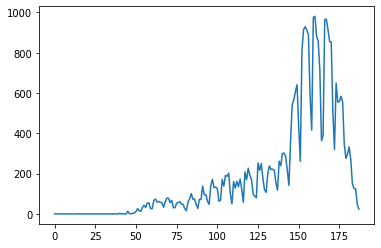

In [1041]:
plt.plot(df1)

In [1042]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [1043]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 =scaler.fit_transform(np.array(df1).reshape(-1,1))

df1

array([[0.00101937],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00101937],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.0030581 ],
       [0.        ],
       [0.00101937],
       [0.        ],
       [0.        ],
       [0.01325178],
       [0.00101937],
       [0.001

In [1044]:
df1.shape

(188, 1)

In [1045]:
train_percent = 0.60# train_precent:1-train_percent train-test split  was 0.70

training_size = int(len(df1)*train_percent)
test_size = len(df1)-training_size

train_data = df1[0:training_size,:]

test_data = df1[training_size:,:1]

In [1046]:
training_size,test_size

(112, 76)

In [1047]:
train_data

array([[0.00101937],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00101937],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.0030581 ],
       [0.        ],
       [0.00101937],
       [0.        ],
       [0.        ],
       [0.01325178],
       [0.00101937],
       [0.001

In [1048]:
test_data

array([[0.16513761],
       [0.13761468],
       [0.17635066],
       [0.12538226],
       [0.05912334],
       [0.21202854],
       [0.17329256],
       [0.23139653],
       [0.19571865],
       [0.17533129],
       [0.1019368 ],
       [0.08970438],
       [0.08154944],
       [0.2579001 ],
       [0.22018349],
       [0.254842  ],
       [0.18042813],
       [0.12232416],
       [0.10907238],
       [0.20285423],
       [0.24260958],
       [0.22426096],
       [0.22629969],
       [0.22222222],
       [0.15698267],
       [0.12028542],
       [0.26707441],
       [0.24362895],
       [0.3058104 ],
       [0.30784913],
       [0.29051988],
       [0.22222222],
       [0.14475025],
       [0.36697248],
       [0.55147808],
       [0.57798165],
       [0.61875637],
       [0.65341488],
       [0.44342508],
       [0.26605505],
       [0.82568807],
       [0.93272171],
       [0.94699286],
       [0.93068298],
       [0.90621814],
       [0.59734964],
       [0.42405708],
       [0.993

In [1049]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [], []

  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [1050]:
time_step = 2# was 2

X_train,y_train = create_dataset(train_data,time_step)

X_test,y_test = create_dataset(test_data,time_step)

In [1051]:
X_train.shape

(109, 2)

In [1052]:
X_test.shape

(73, 2)

In [1053]:
#reshape input to be [samples,time steps,features], a requirement for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [1054]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM  


In [1055]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [1056]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_74 (LSTM)               (None, 2, 50)             10400     
_________________________________________________________________
lstm_75 (LSTM)               (None, 2, 50)             20200     
_________________________________________________________________
lstm_76 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [1057]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)#batch size was 64 , epochs was 100

Epoch 1/100
2/2 [==============================] - 1s 648ms/step - loss: 0.0044 - val_loss: 0.2544
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0036 - val_loss: 0.2440
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - val_loss: 0.2340
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0027 - val_loss: 0.2250
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0026 - val_loss: 0.2174
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0027 - val_loss: 0.2125
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0028 - val_loss: 0.2109
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - val_loss: 0.2117
Epoch 9/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0027 - val_loss: 0.2138
Epoch 10/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0026 - val_loss: 0.2164
Epoch 11/100
2/2 [

First our model was overfitting (training loss decreased while validation loss increased) However, validation loss began to decrease, which resulted in a better model)

In [1058]:
train_predict = model.predict(X_train)#will give the corresponding predicted y_train values
test_predict = model.predict(X_test)# will give the correspinding y_test values

#we will need to compare these values with y_train and y_test to guage accuracy


In [1059]:
#transforming back to original form (from a value b/w 0 and 1 to the actual number of daily cases)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [1060]:
import math
from sklearn.metrics import mean_squared_error

In [1061]:
math.sqrt(mean_squared_error(y_train,train_predict)) # was 78.33284474245686

59.0609861427583

In [1062]:
math.sqrt(mean_squared_error(y_test,test_predict)) # was 478.76947420348716

387.58379074629636

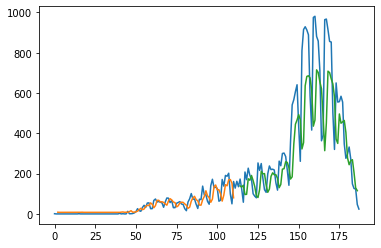

In [1063]:
##now plotting

look_back = time_step  #basically our timestep--> we use the last time_step points to make  a prediction on the next data point

#shift train predictions for plotting (orange)
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

#shift test predictions for plotting(green)
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len( df1)-1,:] = test_predict

#plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))#blue
plt.plot(trainPredictPlot)#orange
plt.plot(testPredictPlot)#green
plt.show()


In [1064]:
from numpy import array


def makePrediction(days):
  x_input = test_data[len(test_data)-time_step:].reshape(1,-1)
  temp_input = list(x_input)
  temp_input = temp_input[0].tolist()
  output = []
  for i in range(days):

    if len(temp_input) > time_step:
      x_input = np.array(temp_input[1:])
      x_input = x_input.reshape(1,-1)
      x_input = x_input.reshape((1,time_step,1))
      yhat = model.predict(x_input,verbose=0)
      temp_input.extend(yhat[0].tolist())
      temp_input = temp_input[1:]
      output.extend(yhat.tolist())
    else:
      x_input = x_input.reshape((1,time_step,1))
      yhat = model.predict(x_input,verbose=0)
      temp_input.extend(yhat[0].tolist())
      output.extend(yhat.tolist())
 
  return output



In [1065]:
predictions  = makePrediction(30)

day_new = np.arange(1,1+len(predictions))
day_pred = np.arange(1+len(predictions),1+2*len(predictions))

In [1066]:
len(df1)

188

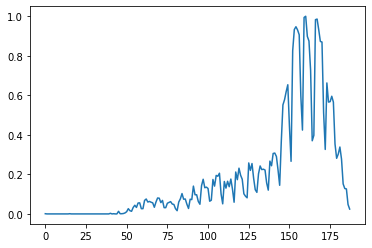

In [1067]:
#plt.plot(day_new,scaler.inverse_transform(df1))
#plt.plot(day_pred,scaler.inverse_transform(predictions))

#this is without the predictions

plt.plot(df1)



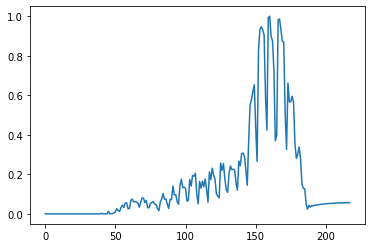

In [1068]:
df2 = df1.tolist()
df2.extend(predictions)
plt.plot(df2)
#this is with the predictions, so the model predicts that it will flatline 


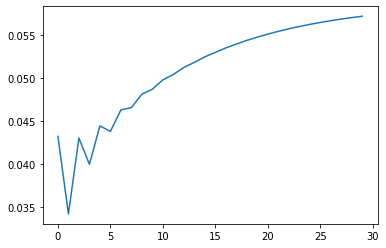

In [1069]:
plt.plot(predictions)#this is the curve of the predictions zoomed in 

In [1070]:
scaler.inverse_transform(predictions)

array([[42.42294558],
       [33.56441021],
       [42.22648644],
       [39.23212   ],
       [43.6115018 ],
       [42.98452679],
       [45.4319593 ],
       [45.70596714],
       [47.23818614],
       [47.80699597],
       [48.87081646],
       [49.4911695 ],
       [50.28907324],
       [50.86956288],
       [51.49824089],
       [52.01007691],
       [52.51965445],
       [52.95900692],
       [53.37840577],
       [53.75067607],
       [54.09860002],
       [54.41201077],
       [54.70179878],
       [54.96478461],
       [55.20661815],
       [55.42691199],
       [55.62891868],
       [55.81328139],
       [55.9820905 ],
       [56.1362962 ]])

In [1071]:
new_df = removeNaN(df.reset_index()['cumulativecases_specimen'])
index = len(new_df) - 1
for i in range(len(predictions)):
  new_df[index + i + 1] = new_df[index] + scaler.inverse_transform(predictions)[i][0] 

new_df[184:]

184    34913.000000
185    35037.000000
186    35084.000000
187    35108.000000
188    35150.422946
189    35141.564410
190    35150.226486
191    35147.232120
192    35151.611502
193    35150.984527
194    35153.431959
195    35153.705967
196    35155.238186
197    35155.806996
198    35156.870816
199    35157.491169
200    35158.289073
201    35158.869563
202    35159.498241
203    35160.010077
204    35160.519654
205    35160.959007
206    35161.378406
207    35161.750676
208    35162.098600
209    35162.412011
210    35162.701799
211    35162.964785
212    35163.206618
213    35163.426912
214    35163.628919
215    35163.813281
216    35163.982091
217    35164.136296
Name: cumulativecases_specimen, dtype: float64

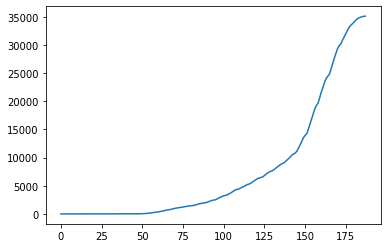

In [1072]:
plt.plot(df['cumulativecases_specimen']) # this is the current curve

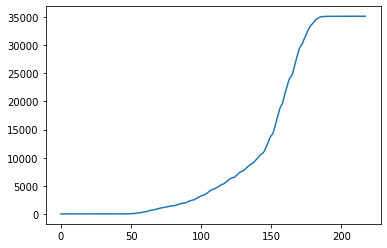

In [1073]:
plt.plot(new_df) # this is the new curve with the prediction

The actual curve is flattening out just like we predicted with our prediction curve